# Introduction to probability

## Exercise 1 - Working with conditional probabilities

Hair / Eye colors dataset was fetched from https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/HairEyeColor.html.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/hair_eye_color.csv')
df.set_index(['Gender', 'Eye'])

Black  Brown  Red  Blond
Gender Eye                            
M      Brown     32     53   10      3
       Blue      11     50   10     30
       Hazel     10     25    7      5
       Green      3     15    7      8
F      Brown     36     66   16      4
       Blue       9     34    7     64
       Hazel      5     29    7      5
       Green      2     14    7      8

In [3]:
# Sum across gender (table 4.1)
frequencies = df.groupby('Eye').sum()
total = df.set_index(['Gender', 'Eye']).sum().sum()
probabilities = (frequencies / total)
probabilities.round(2)

,Black,Brown,Red,Blond
Eye,,,,
Blue,0.03,0.14,0.03,0.16
Brown,0.11,0.20,0.04,0.01
Green,0.01,0.05,0.02,0.03
Hazel,0.03,0.09,0.02,0.02


In [4]:
# Sum across gender and hair color (table 4.1 eye color margin)
eye_probability = probabilities.sum(axis=1).sort_values(ascending=False)
eye_probability.round(2)

Eye
Brown    0.37
Blue     0.36
Hazel    0.16
Green    0.11
dtype: float64

In [5]:
# Sum across gender and eye color (table 4.1 hair color margin)
hair_probability = probabilities.sum(axis=0)
hair_probability.round(2)

Black    0.18
Brown    0.48
Red      0.12
Blond    0.21
dtype: float64

In [6]:
# Hair probability conditional on blue eyes
(probabilities.loc['Blue'] / eye_probability['Blue']).round(2)

Black    0.09
Brown    0.39
Red      0.08
Blond    0.44
Name: Blue, dtype: float64

### More examples

In [7]:
# Hair color probabilities given brown eyes
(probabilities.loc['Brown'] / eye_probability['Brown']).round(2)

Black    0.31
Brown    0.54
Red      0.12
Blond    0.03
Name: Brown, dtype: float64

In [8]:
# Eye color probabilities given brown hair
(probabilities['Brown'] / hair_probability['Brown']).round(2)

Eye
Blue     0.29
Brown    0.42
Green    0.10
Hazel    0.19
Name: Brown, dtype: float64

## Exercise 2 - Simulate running proportion

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn  # Just for style

%matplotlib inline

End proportion: 0.796


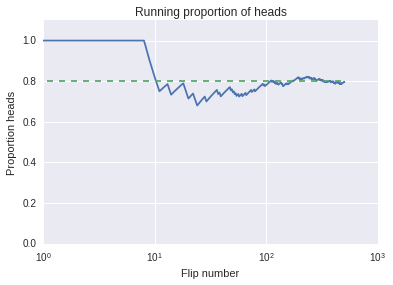

In [10]:
N = 500
p_head = .8

coin_flips = np.random.rand(N) < p_head
running_avarage = np.cumsum(coin_flips) / (np.arange(N) + 1)
print('End proportion: {}'.format(running_avarage[-1]))

# Plot
plt.title('Running proportion of heads')
plt.gca().set(xscale='log')
plt.plot(running_avarage)
plt.ylim(0, 1.1)
plt.xlabel('Flip number')
plt.ylabel('Proportion heads')
# Plot proportion line
plt.plot((0, N), (p_head, p_head), linestyle='dashed');

## Exercise 3 - Deriving a long run proportions analytically

In a pinochle deck there are 6 values: 9, 10, Jack, Queen, King, and Ace. There are 2 card from each value for each of the standard suits.

**(A)** The probability for each value is the same, and there are 6 different values. Therefore, the probability to get a 10 is 1 / 6.

**(B)** The probability to get a 10 or Jack is 2 / 6.

## Exercise 4 - Working with probability density functions

In [11]:
def p(x):
    return 6 * x * (1 - x)

**(A)** Plot and approximate the integral.

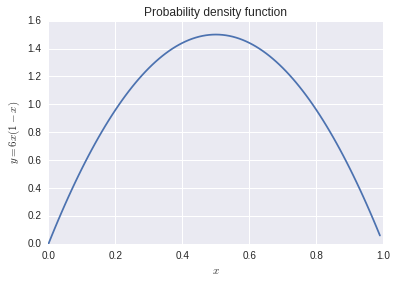

In [12]:
dx = 0.01
x = np.arange(0, 1, dx)
plt.plot(x, p(x))
plt.xlabel('$x$')
plt.ylabel('$y = 6x(1 - x)$')
plt.title('Probability density function');

In [13]:
integral = np.sum(p(x) * dx)
print('Approximated integral = {}'.format(integral))

Approximated integral = 0.9999


**(B)** Deriving the integral analytically:

$$\int_{0}^{1}dx\ 6x(1 - x) = \int_{0}^{1}dx\ 6x - 6x ^ 2 = 3x ^ 2 - 2x ^ 3 \biggr\rvert_ {0}^{1} = 3 - 2 = 1$$

**(C)** The integral is 1, satisfying Equation 4.3.

**(D)** The maximal value is 0.5.

## Exercise 5 - Using the normal distribution to describe beliefs.

**(A)** Approximate the probability mass from $\mu - \alpha$ to $\mu + \alpha$.

In [14]:
from scipy.stats import norm

In [15]:
mu = 0
alpha = 1
norm_pdf = norm(mu, alpha).pdf

dx = 0.01
base = np.arange(-3, 3, dx)
x = np.arange(-alpha, alpha, dx)

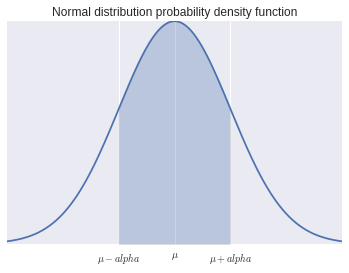

In [16]:
plt.plot(base, norm_pdf(base))
plt.fill_between(x, 0, norm_pdf(x), alpha=0.3)
plt.title('Normal distribution probability density function')
plt.xticks([-1, 0, 1], ["$\mu - alpha$", "$\mu$", "$\mu + alpha$"])
plt.yticks([], []);

In [17]:
integral = np.sum(norm_pdf(x) * dx)
print('Approximated integral = {:.3}'.format(integral))

Approximated integral = 0.683


**(B)** If women's heights are normally distributed, centered at 162cm and with 2/3 of them between 147 and 177cm, then $\mu = 162$ and $\alpha = 177 - 162 = 15$.

## Exercise 6 - Conditional probability, join probability, and independence of attributes

In [18]:
grades_proportions = np.array([.2, .2, .6])
raw_data = [[.3, .6, .1],
            [.6, .3, .1],
            [.3, .1, .6]]
df = pd.DataFrame(raw_data, columns=['IceCream', 'Fruit', 'FrenchFries'], index=['1st', '6th', '11th'])
joint_probabilities = df.mul(grades_proportions, axis=0)
joint_probabilities

,IceCream,Fruit,FrenchFries
1st,0.06,0.12,0.02
6th,0.12,0.06,0.02
11th,0.18,0.06,0.36


In [19]:
first_ice_cream = joint_probabilities.loc['1st', 'IceCream']
first = joint_probabilities.loc['1st'].sum()
ice_cream = joint_probabilities.IceCream.sum()
print("p(1st, IceCream) = {}".format(first_ice_cream))
print("p(1st) * p(IceCream) = {}".format(ice_cream * first))
print('Are they equal? {}'.format(np.allclose(first_ice_cream, ice_cream * first)))

p(1st, IceCream) = 0.06
p(1st) * p(IceCream) = 0.072
Are they equal? False
